In [9]:
from __future__ import print_function

import sys
import os

#sys.path.append('UrbanCNN/');
#sys.path.append('srimmele/');
#sys.path.append('ecbm4040/');

from matplotlib.pyplot import imshow, plot

from srimmele.data_utils import getCityImages
from UrbanCNN.utils import generator_from_file

# these magics ensure that external modules that are modified are also automatically reloaded
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
city = 'berlin, de'
if not os.path.exists('imagery/' + city):
    getCityImages(city)
else:
    print ('Image files already extracted')

Image files already extracted


In [3]:
train = generator_from_file('data/train.csv', image_generator=None, balance=1, \
                            batch_size = 35, seed=26, new_img_shape= (224,224), \
                            class_dict=None, shuffle=True, channels="RGB",
                            downsample=False, crop=42, batch_type = 'training', one_hot = False)


In [4]:
test = next(train)

/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


array([7, 1, 0, 4, 6, 1, 7, 4, 4, 4])

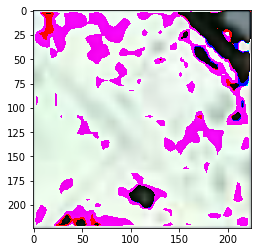

In [5]:
image =imshow(test[0][0,:,:,:])
test[1][:10]

In [6]:
conv_feat_dict = {}

conv_feat_dict[0] = [64 , 64]
conv_feat_dict[1] = [128 , 128]
conv_feat_dict[2] = [256 ,256, 256]
conv_feat_dict[3] = [512 , 512, 512]
conv_feat_dict[4] = [512 , 512, 512]

conv_kernel_dict = dict(keys = conv_feat_dict.keys())

conv_kernel_dict[0] = [3] * 2
conv_kernel_dict[1] = [3] * 2
conv_kernel_dict[2] = [3] * 3
conv_kernel_dict[3] = [3] * 3
conv_kernel_dict[4] = [3] * 3

pooling_size_dict = dict(keys = conv_feat_dict.keys())

pooling_size_dict[0] = [3] * 2
pooling_size_dict[1] = [3] * 2
pooling_size_dict[2] = [3] * 3
pooling_size_dict[3] = [3] * 3 
pooling_size_dict[4] = [3] * 3

fc_units = [4096, 4096]


In [18]:
import tensorflow as tf
from srimmele.classifiers import training

tf.reset_default_graph()

training(conv_feat_dict = conv_feat_dict,
                       fc_units = fc_units,
                       conv_kernel_dict = conv_kernel_dict,
                       pooling_size_dict = pooling_size_dict,
                       img_size = 224, batch_size=100,
                       l2_norm = 0,
                       learning_rate=0.1,
                       epoch = 10, verbose = True)


3
64
64
128
128
256
256
256
512
512
512
512
512
INFO:tensorflow:Summary name VGG 16 Loss is illegal; using VGG_16_Loss instead.
epoch 1 


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Iteration: 
5
Iteration: 
10
Iteration: 
15
Iteration: 
20
2000/2000 loss: 2.1891298294067383 validation accuracy : 18.5%
Best validation accuracy! iteration:20 accuracy: 18.5%
epoch 2 
Iteration: 
25
Iteration: 
30
Iteration: 
35
Iteration: 
40
2000/2000 loss: 2.034212112426758 validation accuracy : 29.0%
Best validation accuracy! iteration:40 accuracy: 29.0%
epoch 3 
Iteration: 
45
Iteration: 
50
Iteration: 
55
Iteration: 
60
2000/2000 loss: 1.9327114820480347 validation accuracy : 21.0%
epoch 4 
Iteration: 
65
Iteration: 
70
Iteration: 
75
Iteration: 
80
2000/2000 loss: 1.8341180086135864 validation accuracy : 26.0%
epoch 5 
Iteration: 
85
Iteration: 
90
Iteration: 
95
Iteration: 
100
2000/2000 loss: 1.760133981704712 validation accuracy : 25.5%
epoch 6 
Iteration: 
105
Iteration: 
110
Iteration: 
115
Iteration: 
120
2000/2000 loss: 1.6853471994400024 validation accuracy : 26.0%
epoch 7 
Iteration: 
125
Iteration: 
130
Iteration: 
135
Iteration: 
140
2000/2000 loss: 1.67567801475524